In [7]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
pumpkins.isnull().sum()

new_columns = ['Variety','Package', 'Month', 'Low Price', 'High Price', 'Date', 'City Name', 'Origin', 'Item Size', 'Color']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
print(pumpkins)

      City Name        Package      Variety     Date  Low Price  High Price  \
0     BALTIMORE   24 inch bins          NaN  4/29/17     270.00      280.00   
1     BALTIMORE   24 inch bins          NaN   5/6/17     270.00      280.00   
2     BALTIMORE   24 inch bins  HOWDEN TYPE  9/24/16     160.00      160.00   
3     BALTIMORE   24 inch bins  HOWDEN TYPE  9/24/16     160.00      160.00   
4     BALTIMORE   24 inch bins  HOWDEN TYPE  11/5/16      90.00      100.00   
...         ...            ...          ...      ...        ...         ...   
1752  ST. LOUIS  22 lb cartons    MINIATURE  9/30/16      14.75       14.75   
1753  ST. LOUIS   36 inch bins    MINIATURE  9/26/16     275.00      275.00   
1754  ST. LOUIS   36 inch bins    MINIATURE  9/27/16     275.00      275.00   
1755  ST. LOUIS   36 inch bins    MINIATURE  9/28/16     275.00      275.00   
1756  ST. LOUIS   36 inch bins    MINIATURE  9/29/16     275.00      275.00   

        Origin Item Size   Color  
0     MARYLAND  

In [10]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin', 'Item Size', 'Variety', 'City Name', 'Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
new_pumpkins.dropna(inplace=True)
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='Item Size'>

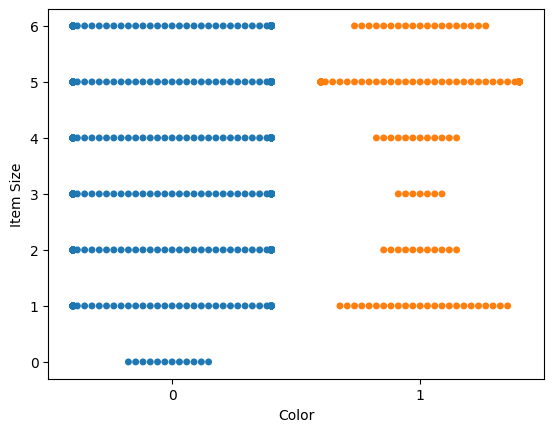

In [14]:
#pakai SNS untuk melihat perbandingan labu berwarna dengan tidak berwarna berdasarkan ukurannya

import seaborn as sns


sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

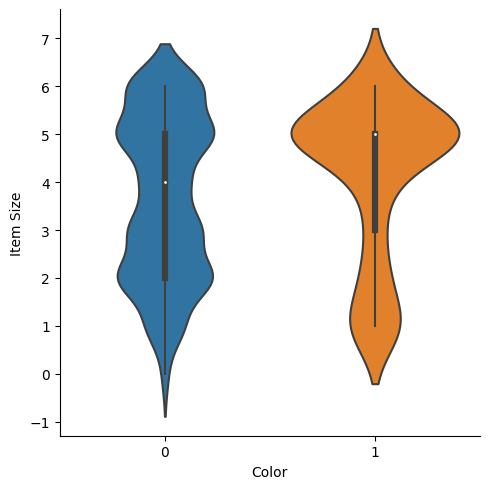

In [18]:
#gaya biola anjay
sns.catplot(x="Color", y="Item Size", kind="violin", data=new_pumpkins)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

Selected_features = ['Origin', 'Item Size', 'Variety', 'City Name', 'Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted Labels: ', predictions)
print('Accuracy : ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted Labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy :  0.8140703517587939


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]], dtype=int64)

C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akuradz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

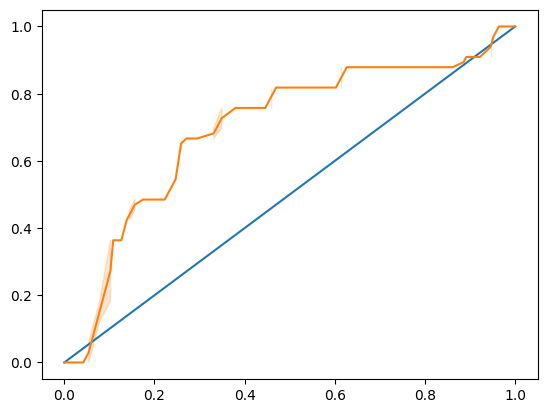

In [22]:
# memastikan bahwa model yang kita buat sudah menghasilkan akurasi yang baik
# menggunakan ROC curve
from cv2 import threshold
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)

#kalkulasi ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1]) #False positive Rate VS True positive Rate
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [23]:
# cek auc skor
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.6976998904709748
